# Asia Bayesian Network.

authors:<br>
Jacob Schreiber [<a href="mailto:jmschreiber91@gmail.com">jmschreiber91@gmail.com</a>]<br>
Nicholas Farn [<a href="mailto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>]

This example shows how to create an Asia Bayesian Network. A description of the network can be found <a href="http://www.norsys.com/tutorials/netica/secA/tut_A1.htm">here</a>.

In [3]:
%pylab inline
from pomegranate import *

Populating the interactive namespace from numpy and matplotlib


Let's create the distributions starting with Asia and the conditional probability for tuberculosis.

In [13]:
asia = DiscreteDistribution( { 'True' : 0.5, 'False' : 0.5 } )

tuberculosis = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.2 ],
     [ 'True', 'False', 0.8 ],
     [ 'False', 'True', 0.01 ],
     [ 'False', 'False', 0.99 ]], [asia])

Then the distribution for smoking along with the conditional probability of lung cancer and bronchitis.

In [14]:
smoking = DiscreteDistribution( { 'True' : 0.67, 'False' : 0.33 } )

lung = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.67 ],
     [ 'True', 'False', 0.33 ],
     [ 'False', 'True', 0.02 ],
     [ 'False', 'False', 0.98 ]], [smoking] )

dys = ConditionalProbabilityTable(
    [[ 'True', 'True', 0.67 ],
     [ 'True', 'False', 0.33],
     [ 'False', 'True', 0.52 ],
     [ 'False', 'False', 0.48 ]], [lung] )

Then the probability of an x-ray, which is dependent on whether one has tuberculosis or cancer.

Finally the probability of dyspnea, which is dependent on whether one has bronchitis and tuberculosis or cancer.

Now let's create the states for our bayesian network.

In [15]:
s0 = State( asia, name="asia" )
s1 = State( tuberculosis, name="tuberculosis" )
s2 = State( smoking, name="smoker" )
s3 = State( lung, name="lung" )
s4 = State( dys, name="dys" )


Finally we can create our bayesian network. We do this by creating an instance of BayesianNetwork, then adding the states.

In [16]:
network = BayesianNetwork( "asia" )
network.add_nodes(s0, s1, s2, s3, s4)
print(network.node_count())

5


Then we add the edges to our network.

In [17]:
network.add_edge( s0, s1 )
network.add_edge( s2, s3 )
network.add_edge( s3, s4 )


We finish by baking our network to finalize its structure.

In [18]:
network.bake()

Let's take a look at the resulting structure:

0.30076300000000006


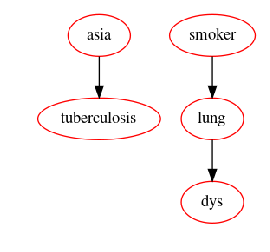

In [20]:
print(network.probability([None,None,'True','True','True']))
network.plot()

Now let's test out our network on a person who has tuberculosis, is not a smoker, and has bronchitis.

In [11]:
observations = { 'tuberculosis' : 'True', 'smoker' : 'False', 'bronchitis' : 'True' }
beliefs = map( str, network.predict_proba( observations ) )
print "\n".join( "{}\t\t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) )

asia		{
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "False" :0.04761904761904782,
            "True" :0.9523809523809521
        }
    ],
    "name" :"DiscreteDistribution"
}
tuberculosis		True
smoker		False
cancer		{
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :0.020000000000000438,
            "False" :0.9799999999999995
        }
    ],
    "name" :"DiscreteDistribution"
}
bronchitis		True
TvC		{
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :1.0,
            "False" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}
xray		{
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "True" :0.8849999999999999,
            "False" :0.11500000000000017
        }
    ],
    "name" :"DiscreteDistribution"
}
dyspnea